In [45]:
import tensorflow as tf
# List all physical GPU devices
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    try:
        # Enable memory growth for the first GPU
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth enabled for:", physical_devices[0])
    except RuntimeError as e:
        # Memory growth must be set before initializing GPUs
        print("Error setting memory growth:", e)
else:
    print("No GPU devices found.")

with tf.device('/cpu:0'):
    import cv2
    import os
    from sklearn.decomposition import PCA
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.svm import LinearSVC
    from sklearn.metrics import classification_report, accuracy_score
    from tensorflow.keras import layers, models
    from sklearn.preprocessing import LabelEncoder,StandardScaler
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.utils import to_categorical
    from sklearn.preprocessing import LabelEncoder
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report
    from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
    import h5py
    import gc
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    gc.enable

    from tensorflow.python.client import device_lib
    print(device_lib.list_local_devices())

Memory growth enabled for: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13439635619712855962
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4158652416
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2625057879247839018
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [26]:
with tf.device('/cpu:0'):
    # Load the numpy array X from the compressed .npz file
    #X_train = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\X_augemented_train.npz')
    X_train = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\X_train_3.npz')
    X_test  = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\X_test_3.npz')
    #X_val   = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\X_val.npz')
    #Y_train = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\Y_augemented_train.npz')
    Y_train = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\Y_train_3.npz')
    Y_test  = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\Y_test_3.npz')
    #Y_val   = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\Y_val.npz')
    
    
    X_train =X_train['X']
    X_test  =X_test ['X']
    #X_val   =X_val  ['X']
    Y_train =Y_train['X']
    Y_test  =Y_test ['X']
    #Y_val = Y_val ['X']

    # One-hot encode the labels
    label_encoder = LabelEncoder()
    y_train_encoded = to_categorical(label_encoder.fit_transform(Y_train))
    y_test_encoded = to_categorical(label_encoder.transform(Y_test))
    #y_val_encoded = to_categorical(label_encoder.transform(Y_val))

    #X_train = tf.convert_to_tensor(X_train, np.float32)
    #X_test = tf.convert_to_tensor(X_test, np.float32)
    #X_val = tf.convert_to_tensor(X_val, np.float32)

    
    #y_train_encoded = tf.convert_to_tensor(y_train_encoded, np.float32)
    #y_test_encoded = tf.convert_to_tensor(y_test_encoded, np.float32)
    #y_val_encoded = tf.convert_to_tensor(y_val_encoded, np.float32)

    image_input_shape=(X_train[0].shape)
    num_classes=y_train_encoded.shape[1]


    print(image_input_shape, num_classes)

(112, 112, 3) 50


In [27]:
X_train = X_train.reshape(X_train.shape[0], -1)  # (num_samples, num_features)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Perform PCA
n_components = 1568  # Number of eigenfaces
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

# Project data onto the PCA basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [28]:
def SVM(X_train, y_train, X_test, y_test):
    # Step 4: Train SVC with RBF kernel
    svm = SVC(kernel='linear', C=10, gamma='scale', max_iter=10000)  # RBF kernel with hyperparameters
    svm.fit(X_train, y_train)  # Train the model

    # Step 5: Evaluate Model
    y_pred = svm.predict(X_test)  # Make predictions

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return svm, y_pred

In [42]:
# Call the SVM function on the PCA-transformed data
svm, y_pred = SVM(X_train_pca, Y_train, X_test_pca, Y_test)

Accuracy: 0.5659630606860159
              precision    recall  f1-score   support

           0       0.58      0.61      0.60        23
           1       0.35      0.44      0.39        16
           2       0.61      0.58      0.59        19
           3       0.25      0.50      0.33        10
           4       0.61      0.70      0.65        20
           5       1.00      0.72      0.84        18
           6       0.82      0.88      0.85        16
           7       0.67      0.71      0.69        17
           8       0.45      0.56      0.50        16
           9       0.70      0.58      0.64        12
          10       0.36      0.28      0.31        18
          11       0.36      0.60      0.45        15
          12       0.75      0.67      0.71        18
          13       0.67      0.73      0.70        11
          14       0.50      0.39      0.44        18
          15       0.58      0.50      0.54        14
          16       0.39      0.44      0.41        1

In [43]:

def visualize_results(y_test, y_predict):
    # y_predict: Predictions from SVM (already class labels)
    # y_test: True labels (should be class labels, not one-hot encoded)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_predict)

    # Plot confusion matrix with a wider figure
    plt.figure(figsize=(23, 23))  # Wider graph: 12 units wide, 6 units high
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(len(np.unique(y_test))), yticklabels=np.arange(len(np.unique(y_test))))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def class_wise_accuracy(y_test, y_predict):
    # y_predict: Predictions from SVM (class labels)
    # y_test: True labels (class labels)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_predict)

    # Calculate class-wise accuracy
    class_accuracies = cm.diagonal() / cm.sum(axis=1)  # Diagonal elements (correct predictions) / Row sums (total class instances)

    # Print class-wise accuracy
    print("Class-wise accuracy:")
    for i, accuracy in enumerate(class_accuracies):
        print(f"Class {i}: {accuracy * 100:.2f}%")

    # Plot class-wise accuracy as a bar chart with a wider figure
    plt.figure(figsize=(20, 6))  # Wider graph: 12 units wide, 6 units high
    plt.bar(range(len(class_accuracies)), class_accuracies * 100, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy')
    plt.xticks(range(len(class_accuracies)))
    plt.ylim(0, 100)
    plt.show()

    return class_accuracies

def show_images_from_class(X, y, class_label, num_images=5):
    """
    Display a given number of images from a specified class, arranged with 5 images per row.
    
    Parameters:
    - X: The image data (features) as a numpy array or pandas dataframe.
    - y: The labels corresponding to the images (class labels).
    - class_label: The class label for which to show the images.
    - num_images: Number of images to display (default is 5).
    """
    # Find the indices of the images that belong to the given class
    class_indices = np.where(y == class_label)[0]
    
    # Randomly select 'num_images' indices from the class
    selected_indices = np.random.choice(class_indices, num_images, replace=False)
    
    # Calculate the number of rows needed to display the images in 5 per row
    num_rows = (num_images // 5) + (num_images % 5 != 0)
    
    # Set up the plot
    plt.figure(figsize=(15, 3 * num_rows))
    
    for i, idx in enumerate(selected_indices):
        plt.subplot(num_rows, 5, i+1)  # Rows x 5 columns
        plt.imshow(X[idx], cmap='gray')  # Assuming grayscale images, adjust if RGB
        plt.title(f"Class {class_label}")
        plt.axis('off')  # Hide axes
    
    plt.show()

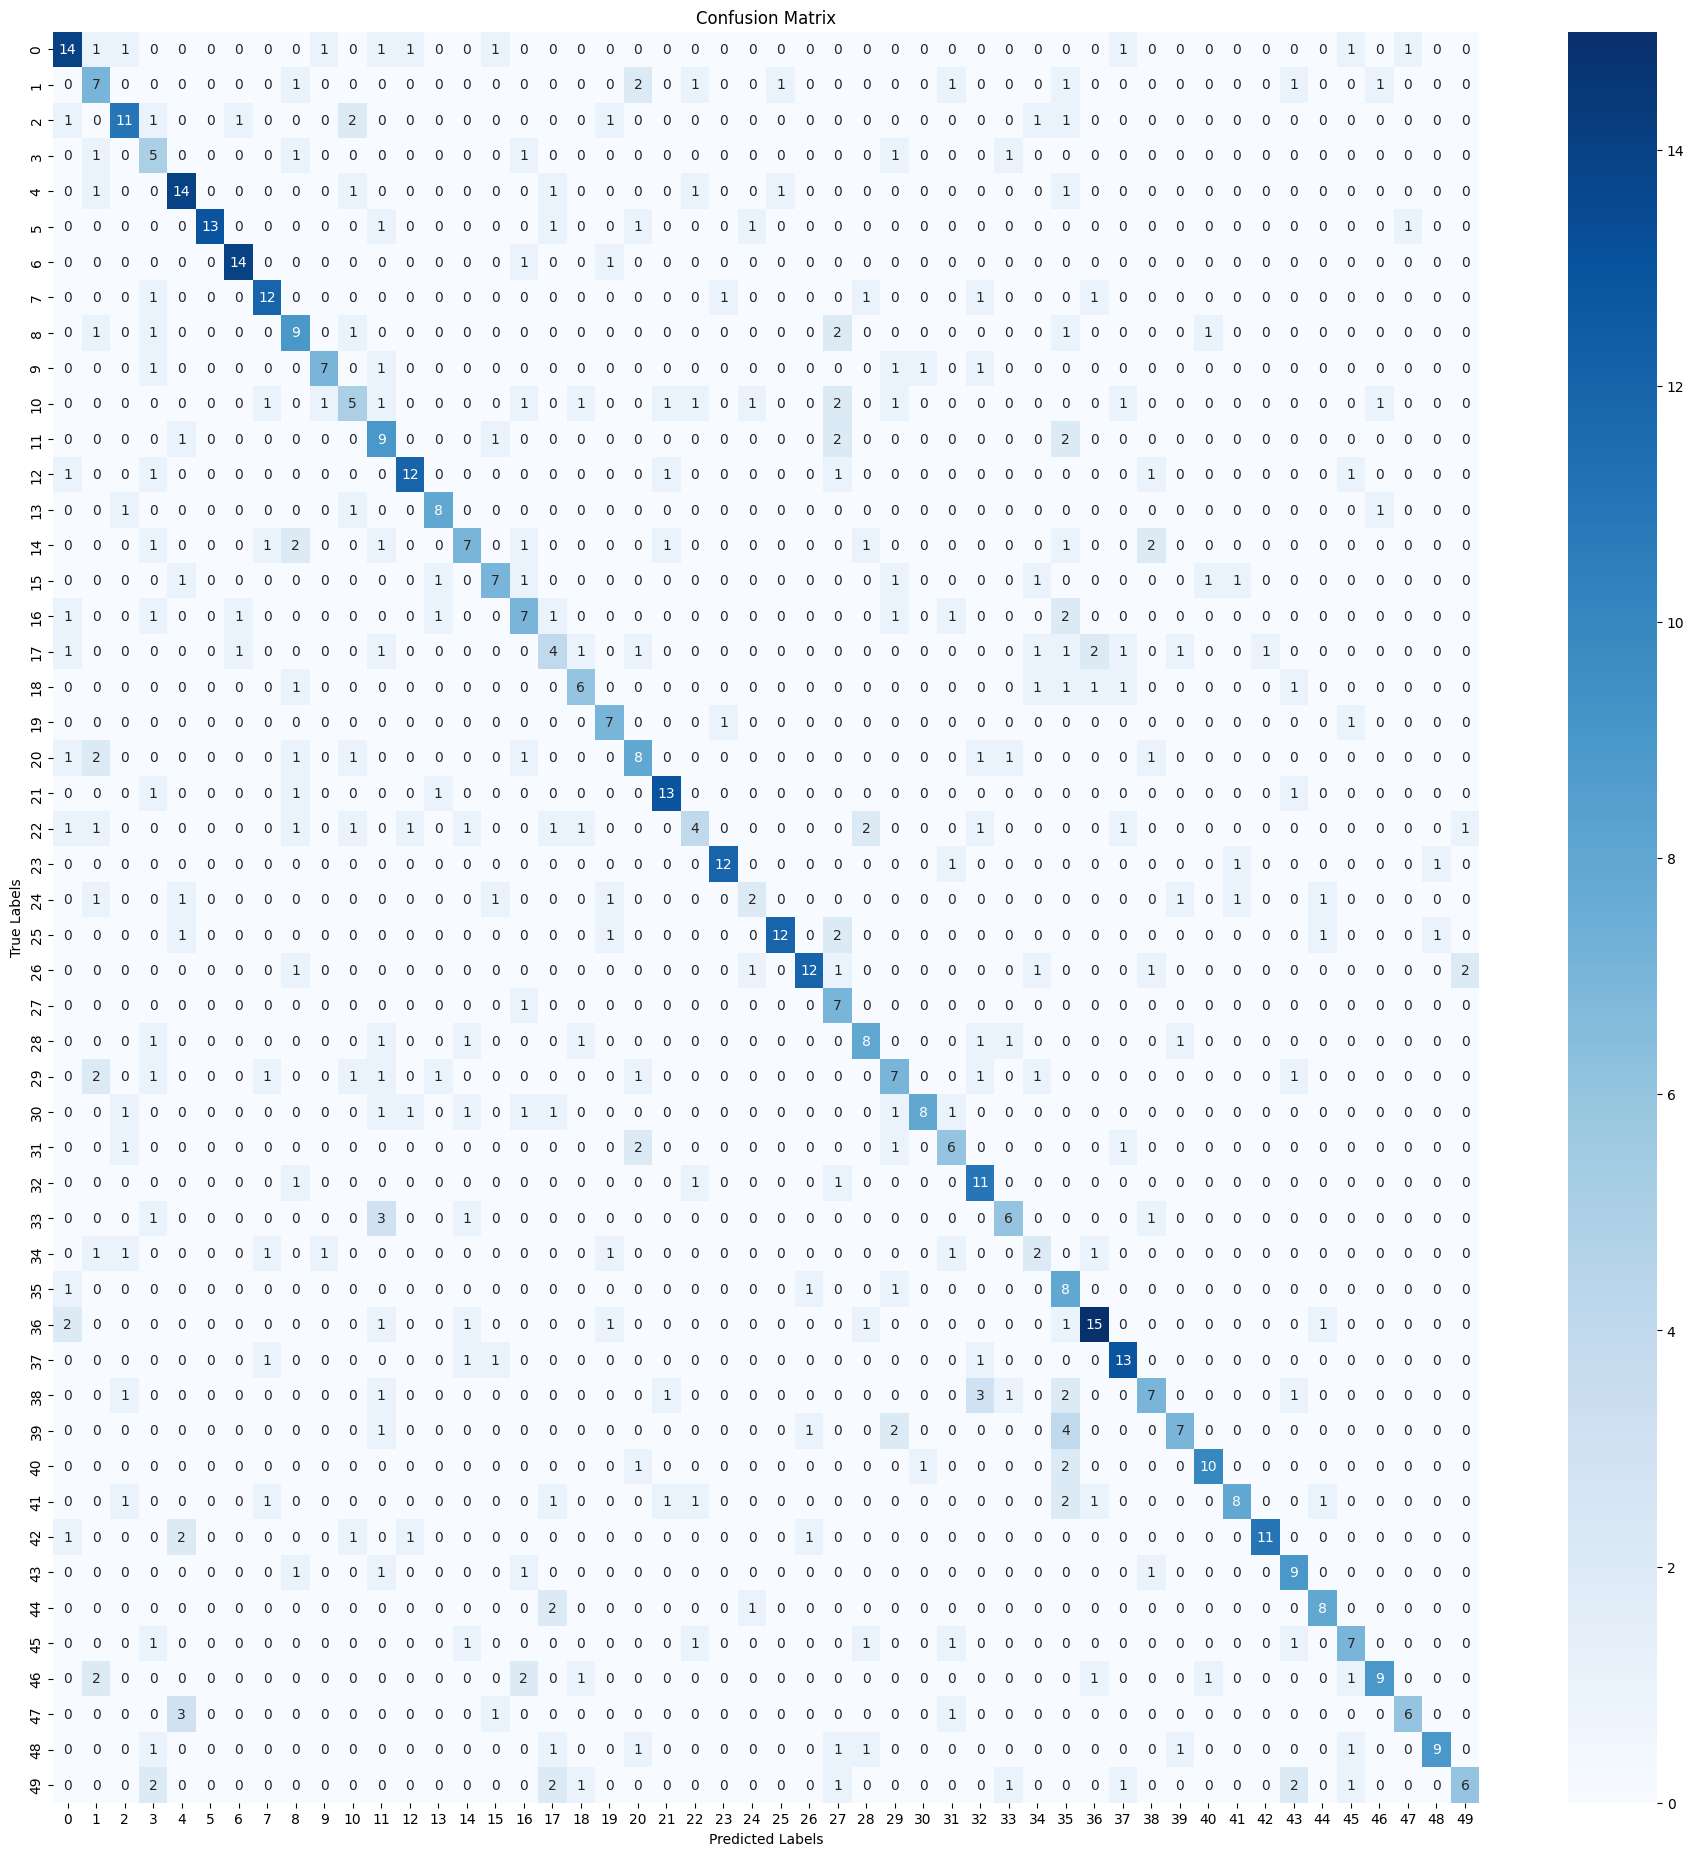

Class-wise accuracy:
Class 0: 60.87%
Class 1: 43.75%
Class 2: 57.89%
Class 3: 50.00%
Class 4: 70.00%
Class 5: 72.22%
Class 6: 87.50%
Class 7: 70.59%
Class 8: 56.25%
Class 9: 58.33%
Class 10: 27.78%
Class 11: 60.00%
Class 12: 66.67%
Class 13: 72.73%
Class 14: 38.89%
Class 15: 50.00%
Class 16: 43.75%
Class 17: 25.00%
Class 18: 50.00%
Class 19: 77.78%
Class 20: 47.06%
Class 21: 76.47%
Class 22: 23.53%
Class 23: 80.00%
Class 24: 22.22%
Class 25: 66.67%
Class 26: 63.16%
Class 27: 87.50%
Class 28: 53.33%
Class 29: 38.89%
Class 30: 50.00%
Class 31: 54.55%
Class 32: 78.57%
Class 33: 50.00%
Class 34: 22.22%
Class 35: 72.73%
Class 36: 65.22%
Class 37: 76.47%
Class 38: 41.18%
Class 39: 46.67%
Class 40: 71.43%
Class 41: 47.06%
Class 42: 64.71%
Class 43: 69.23%
Class 44: 72.73%
Class 45: 53.85%
Class 46: 52.94%
Class 47: 54.55%
Class 48: 56.25%
Class 49: 35.29%


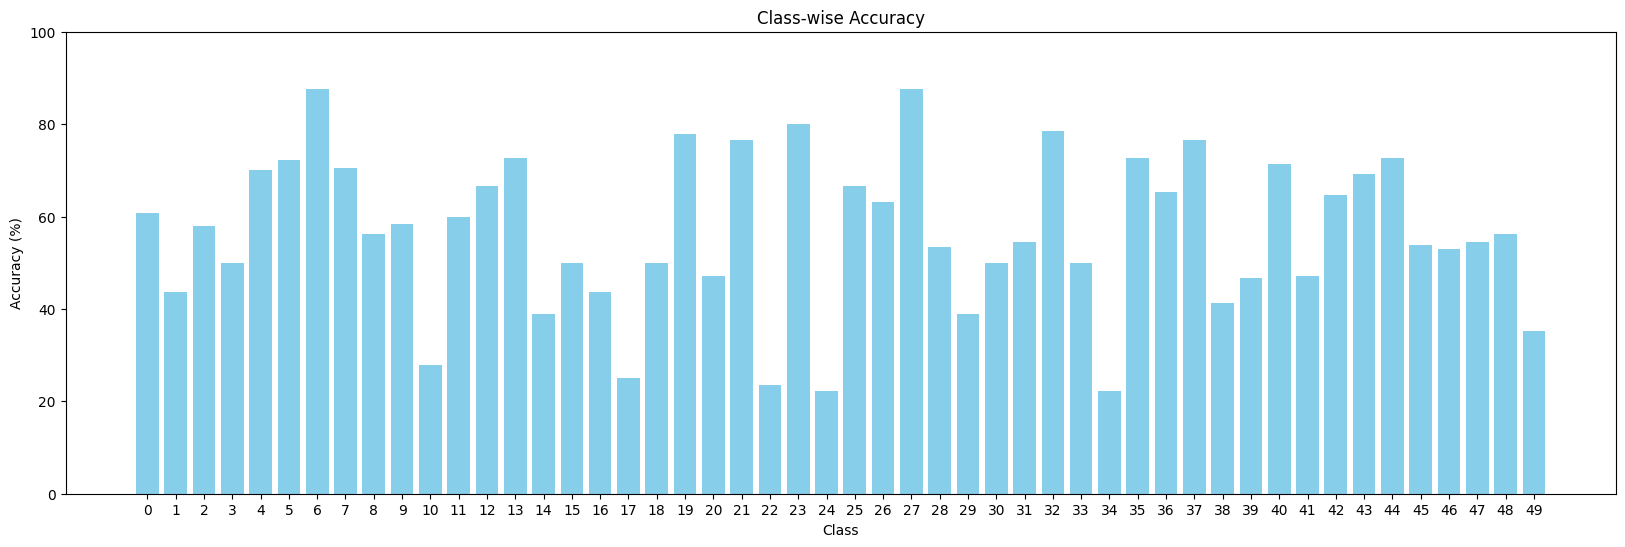

TypeError: Invalid shape (37632,) for image data

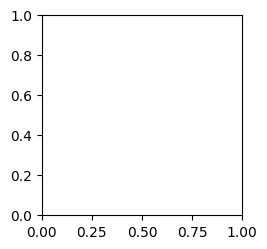

In [46]:
# Visualize confusion matrix
visualize_results(Y_test, y_pred)

# Calculate class-wise accuracy
class_wise_accuracy(Y_test, y_pred)

# Show images for a specific class (e.g., class 0)
show_images_from_class(X_test, Y_test, class_label=0, num_images=15)